In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib


In [5]:
data_path = 'robust_student_loan_dataset.csv' 
data = pd.read_csv(data_path)
print("Dataset Preview:\n", data.head())



Dataset Preview:
    Loan Amount (USD)  Monthly Income (USD)  Monthly Expenses (USD)  \
0             462498                 21405                   10710   
1             205002                 13601                    4619   
2             443293                  5894                   16975   
3             175501                  5514                   15835   
4             332755                 28678                   18261   

   Interest Rate (%)  Disposable Income (USD)  Monthly Installment (USD)  \
0                  8                    10695                    5611.38   
1                  8                     8982                    2487.24   
2                  4                   -11081                    4488.13   
3                 12                   -10321                    2517.93   
4                 12                    10417                    4774.07   

   Time to Repay (Months)  
0                   43.24  
1                   22.82  
2                   

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Amount (USD)          1000 non-null   int64  
 1   Monthly Income (USD)       1000 non-null   int64  
 2   Monthly Expenses (USD)     1000 non-null   int64  
 3   Interest Rate (%)          1000 non-null   int64  
 4   Disposable Income (USD)    1000 non-null   int64  
 5   Monthly Installment (USD)  1000 non-null   float64
 6   Time to Repay (Months)     642 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 54.8 KB
None


In [7]:
data.fillna(data.mean(), inplace=True)

In [8]:
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [9]:
data['DTI Ratio'] = data['Monthly Installment (USD)'] / (data['Monthly Income (USD)'])
data['Loan-to-Income Ratio'] = data['Loan Amount (USD)'] / data['Monthly Income (USD)']


In [10]:
X = data.drop(columns=['Time to Repay (Months)'])  
y = data['Time to Repay (Months)']


In [11]:

scaler = StandardScaler()
scaled_columns = ['Loan Amount (USD)', 'Monthly Income (USD)', 'Interest Rate (%)', 'Monthly Installment (USD)']
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])


data['DTI Ratio'] = data['Monthly Installment (USD)'] / (data['Monthly Income (USD)'])
data['Loan-to-Income Ratio'] = data['Loan Amount (USD)'] / data['Monthly Income (USD)']


X = data.drop(columns=['Time to Repay (Months)'])
y = data['Time to Repay (Months)']


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN Regressor with the desired number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors

# Train the KNN Regressor
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Squared Error: 390676.3122893862
Root Mean Squared Error: 625.0410484835265


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()


lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")


Linear Regression - MAE: 158.00, MSE: 341871.73, R²: 0.02


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_model = LinearRegression()


lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)


mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MAE: {mae_lr:.2f}, MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")


Linear Regression - MAE: 158.00, MSE: 341871.73, R²: 0.02


In [15]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

NameError: name 'model' is not defined

In [ ]:
joblib.dump(model, 'loan_repayment_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
def generate_recommendations(loan_amount, income, monthly_payment, interest_rate):
    if((income/12)>monthly_payment):
        return False
    dti_ratio = monthly_payment / (income / 12)
    loan_to_income_ratio = loan_amount / income

   
    if interest_rate > 0:
        monthly_interest_rate = interest_rate / 100 / 12
        denominator = monthly_payment - loan_amount * monthly_interest_rate
        
        if denominator <= 0:  
            months_to_repay = float('inf')  
        else:
            months_to_repay = np.log(monthly_payment / denominator) / np.log(1 + monthly_interest_rate)
    else:
        if monthly_payment == 0:  
            months_to_repay = float('inf')  
        else:
            months_to_repay = loan_amount / monthly_payment

    
    if months_to_repay != float('inf'):
        months_to_repay = int(np.ceil(months_to_repay))

    
    recommendations = []
    if dti_ratio > 0.4:
        recommendations.append("Consider lowering monthly payments by extending the loan term.")
    if loan_to_income_ratio > 0.6:
        recommendations.append("Evaluate ways to increase income or reduce loan amount.")
    if interest_rate > 5:
        recommendations.append("Explore refinancing options for a lower interest rate.")

    return months_to_repay, recommendations


In [ ]:
sample_input = {
    
    'loan_amount': 500000,
    'income': 60000,
    'monthly_payment': 8000,
    'interest_rate': 3
}
recommendations = generate_recommendations(**sample_input)
print("\nRecommendations for Sample Input:", recommendations)


Recommendations for Sample Input: (69, ['Consider lowering monthly payments by extending the loan term.', 'Evaluate ways to increase income or reduce loan amount.'])


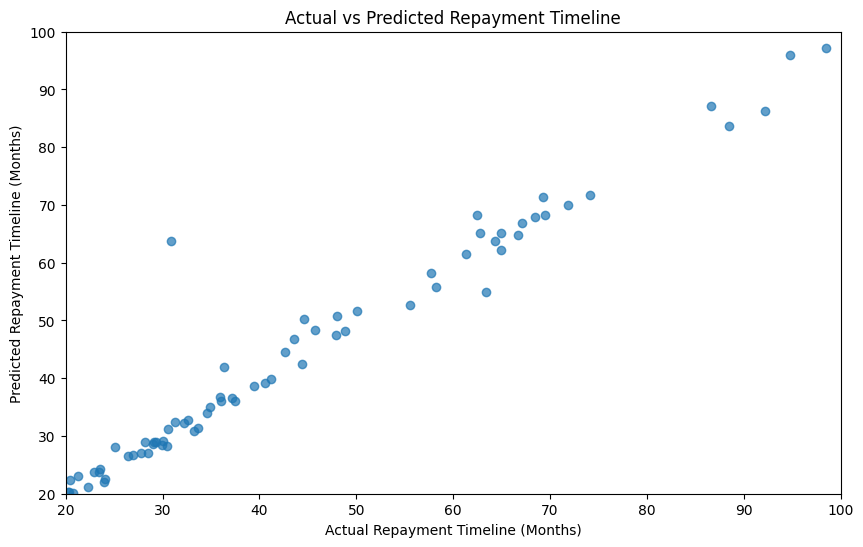

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Repayment Timeline (Months)")
plt.ylabel("Predicted Repayment Timeline (Months)")
plt.title("Actual vs Predicted Repayment Timeline")


plt.xlim(20,100)
plt.ylim(20,100)

plt.show()


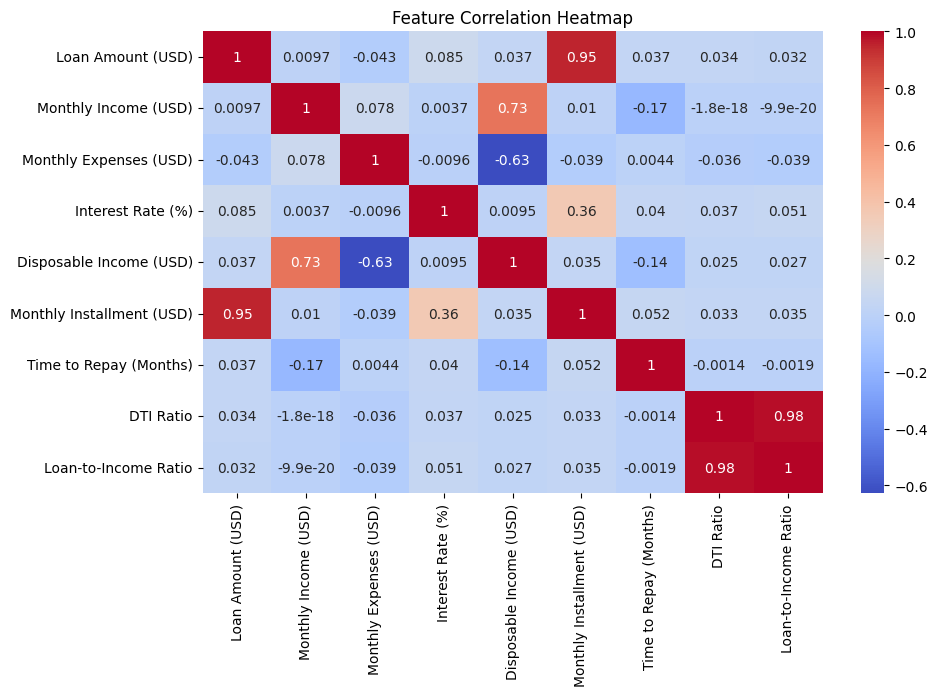

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
sample_input = {
    'loan_amount': 500000,
    'income': 60000,
    'monthly_payment': 80000,
    'interest_rate': 3
}

# Extract values from input
loan_amount = sample_input['loan_amount']
monthly_income = sample_input['income'] / 12  # Convert annual income to monthly income
monthly_payment = sample_input['monthly_payment']
interest_rate = sample_input['interest_rate']

# Calculate derived metrics
dti_ratio = monthly_payment / monthly_income  # Debt-to-Income Ratio
loan_to_income_ratio = loan_amount / sample_input['income']  # Loan-to-Income Ratio
repayment_timeline = loan_amount / monthly_payment  # Simplified repayment timeline (no interest)



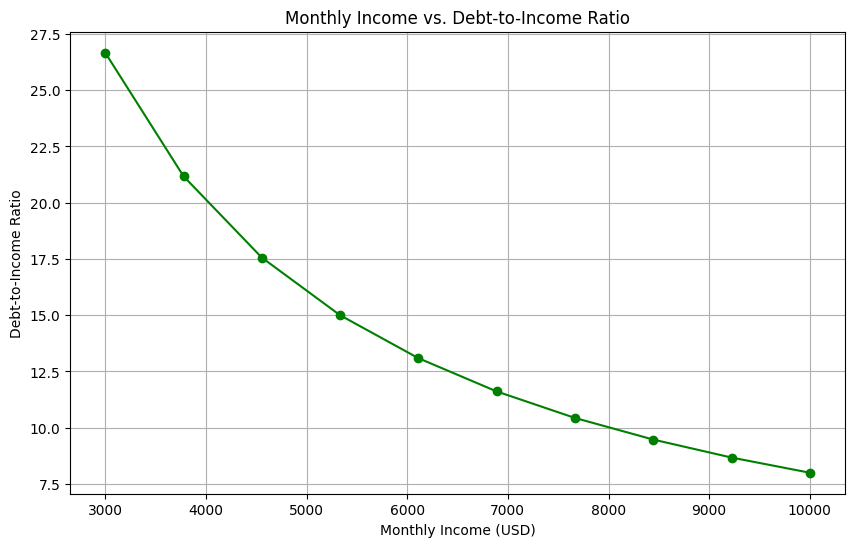

In [ ]:
# Visualization 2: Monthly Income vs. Debt-to-Income Ratio
monthly_incomes = np.linspace(3000, 10000, 10)  # Range of monthly incomes
dti_ratios = [monthly_payment / income for income in monthly_incomes]  # Calculate DTI ratios

plt.figure(figsize=(10, 6))
plt.plot(monthly_incomes, dti_ratios, marker='o', linestyle='-', color='green')
plt.xlabel("Monthly Income (USD)")
plt.ylabel("Debt-to-Income Ratio")
plt.title("Monthly Income vs. Debt-to-Income Ratio")
plt.grid(True)
plt.show()

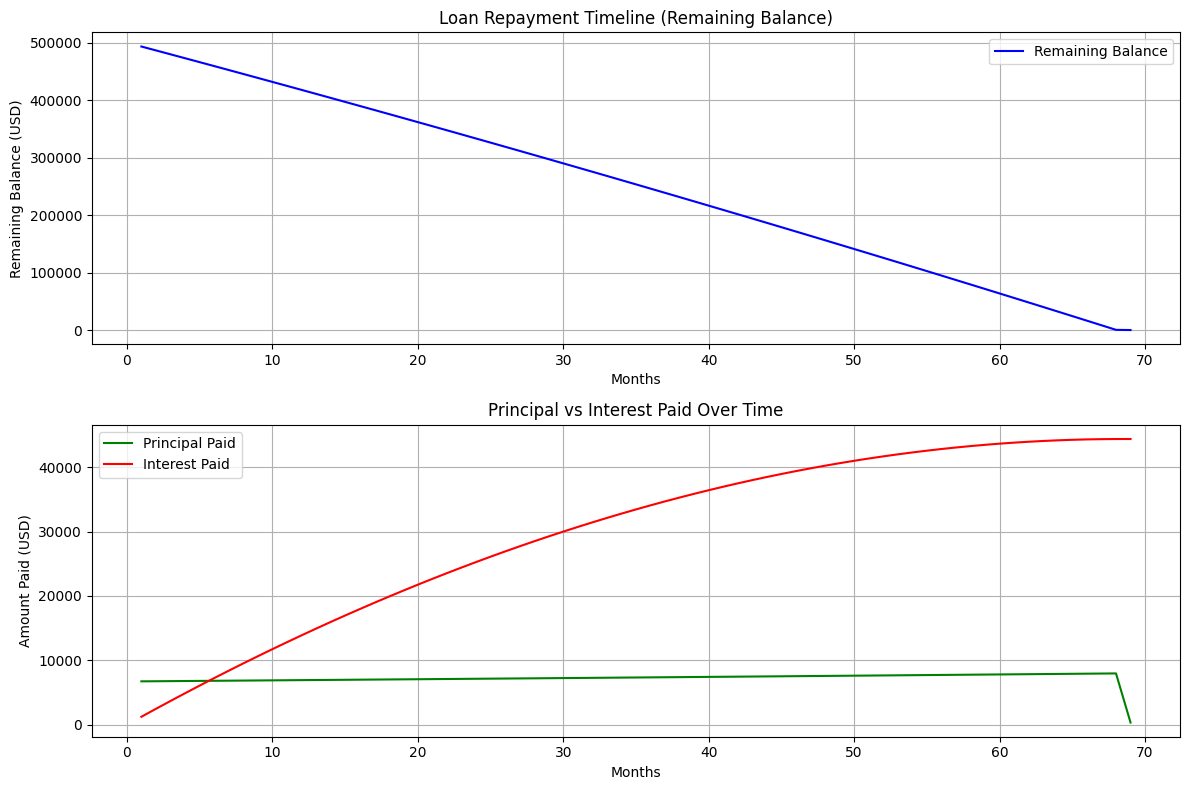

In [ ]:


def generate_loan_repayment_schedule(loan_amount, monthly_payment, interest_rate):
    monthly_interest_rate = interest_rate / 100 / 12
    months = []
    balances = []
    interests = []
    principals = []
    remaining_balance = loan_amount
    total_interest_paid = 0

    while remaining_balance > 0:
        interest_paid = remaining_balance * monthly_interest_rate
        principal_paid = monthly_payment - interest_paid
        if remaining_balance < monthly_payment:
            principal_paid = remaining_balance
            monthly_payment = remaining_balance + interest_paid
        
        remaining_balance -= principal_paid
        total_interest_paid += interest_paid
        
        months.append(len(months) + 1)  # Month number
        balances.append(remaining_balance)
        interests.append(total_interest_paid)
        principals.append(principal_paid)

    return months, balances, interests, principals


loan_amount = 500000
monthly_payment = 8000
interest_rate = 3


months, balances, interests, principals = generate_loan_repayment_schedule(loan_amount, monthly_payment, interest_rate)


plt.figure(figsize=(12, 8))


plt.subplot(2, 1, 1)
plt.plot(months, balances, label='Remaining Balance', color='blue')
plt.xlabel('Months')
plt.ylabel('Remaining Balance (USD)')
plt.title('Loan Repayment Timeline (Remaining Balance)')
plt.grid(True)
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(months, principals, label='Principal Paid', color='green')
plt.plot(months, interests, label='Interest Paid', color='red')
plt.xlabel('Months')
plt.ylabel('Amount Paid (USD)')
plt.title('Principal vs Interest Paid Over Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
